# AW-2: Querying Adventure Works Database with Python 

Please see the blog post by the same name at my website <https://dlwhittenbury.github.io/>.

Helpful Links: 

   - Documentation on pyodbc <https://github.com/mkleehammer/pyodbc/wiki>

   - Specific information about connecting to SQL Server from Windows <https://github.com/mkleehammer/pyodbc/wiki/Connecting-to-SQL-Server-from-Windows>

Import packages 

In [1]:
import pandas as pd
import pyodbc
from PIL import Image
import io

Server and database names 

In [2]:
server_name = "DESKTOP-T6KCVJT"
db_name = "AdventureWorksDW2017"

Connect to Adventure Works database 

In [3]:
connection_str =  'Driver={SQL Server};' + 'Server=' + server_name + ";Database=" + db_name + ";Trusted_Connection=yes;"

In [4]:
conn = pyodbc.connect(connection_str)

In [5]:
type(conn)

pyodbc.Connection

Querying the **DimEmployee table** and put it into a pandas dataframe 

In [6]:
query_1 = "SELECT * FROM dbo.DimEmployee"

In [7]:
df = pd.read_sql(query_1, conn)

Get the summary information about the dataframe, e.g., column names, data types etcetera. 

In [8]:
# help(pd.DataFrame.info)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   EmployeeKey                           296 non-null    int64  
 1   ParentEmployeeKey                     295 non-null    float64
 2   EmployeeNationalIDAlternateKey        296 non-null    object 
 3   ParentEmployeeNationalIDAlternateKey  0 non-null      object 
 4   SalesTerritoryKey                     296 non-null    int64  
 5   FirstName                             296 non-null    object 
 6   LastName                              296 non-null    object 
 7   MiddleName                            283 non-null    object 
 8   NameStyle                             296 non-null    bool   
 9   Title                                 296 non-null    object 
 10  HireDate                              296 non-null    object 
 11  BirthDate          

Print the first few rows of the **DimEmployee** table 

In [10]:
df.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,SalesTerritoryKey,FirstName,LastName,MiddleName,NameStyle,Title,...,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,StartDate,EndDate,Status,EmployeePhoto
0,1,18.0,14417807,None,11,Guy,Gilbert,R,False,Production Technician - WC60,...,12.4500,21,30,True,False,Production,2006-01-28,None,Current,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,7.0,253022876,None,11,Kevin,Brown,F,False,Marketing Assistant,...,13.4615,42,41,True,False,Marketing,2006-08-26,None,Current,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,14.0,509647174,None,11,Roberto,Tamburello,None,False,Engineering Manager,...,43.2692,2,21,True,False,Engineering,2007-06-11,None,Current,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,3.0,112457891,None,11,Rob,Walters,None,False,Senior Tool Designer,...,29.8462,48,80,True,False,Tool Design,2007-07-05,2009-12-28,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,3.0,112457891,None,11,Rob,Walters,None,False,Senior Tool Designer,...,29.8462,48,80,True,False,Tool Design,2009-12-28,None,Current,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [11]:
pic = df.EmployeePhoto[0]
print(pic)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xed\x00\xd8Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\xbc\x1c\x01Z\x00\x03\x1b%G\x1c\x02\x00\x00\x02\x00\x02\x1c\x02x\x00;Successful mature business man with hands folded over white\x1c\x02i\x00\x048837\x1c\x02\x05\x00.Senior business man with hands folded on white\x1c\x02\x19\x00\x03CRM\x1c\x02\x19\x00\x0eDigital Camera\x1c\x02\x19\x00\x11Change Management\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\

Write to jpg file is easily done.

In [12]:
def save_img(binstring_img,name_img):
    with open (name_img,"wb") as f: 
        f.write(binstring_img)

In [13]:
save_img(pic,"employee.jpg")

Show image 

In [14]:
image_stream = io.BytesIO(pic)

In [15]:
image_file = Image.open(image_stream)

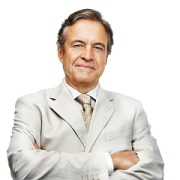

In [16]:
image_file

In [17]:
type(image_file)

PIL.JpegImagePlugin.JpegImageFile

Can also write it to file using the save function

In [18]:
image_file.save("employee-again.jpg")

In [19]:
type(image_file)

PIL.JpegImagePlugin.JpegImageFile

Who is this guy?

In [20]:
df.iloc[0]

EmployeeKey                                                                             1
ParentEmployeeKey                                                                      18
EmployeeNationalIDAlternateKey                                                   14417807
ParentEmployeeNationalIDAlternateKey                                                 None
SalesTerritoryKey                                                                      11
FirstName                                                                             Guy
LastName                                                                          Gilbert
MiddleName                                                                              R
NameStyle                                                                           False
Title                                                        Production Technician - WC60
HireDate                                                                       2006-01-28
BirthDate 